In [1]:
#Importing necessary libraries
import numpy as np
import datetime
import scipy.stats as si
import numpy as np
import scipy.stats as si
import yfinance as yf

from random import gauss
from math import exp,sqrt

import matplotlib.pyplot as plt

In [2]:
#STOCK DETAILS

#S: Current Stock Price
#K: Strike price
#T: Time to maimport matplotlib.pyplot as pltturity in Years
#r: Risk Free interest rate
#sigma: Volatility of underlying asset
    
X=[]
Y1=[]
Y2=[]

s = yf.Ticker('AAPL')
opt = s.option_chain('2022-12-09')
call= opt.calls 
#S = s.history(period = "max")['Close'].iloc[-1]
S=146.32
T = (datetime.date(2022,12,8) - datetime.date(2022,7,24)).days / 365.0

print(S, T)

146.32 0.37534246575342467


In [4]:
#FUNCTION FOR BLACK-SCHOLES METHOD

def black_scholes_calc(S, K, T, r, sigma, option = 'call'): 
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [7]:
for i in range(len(call)):
    v = call.iloc[i]['impliedVolatility']
    r = 0.17900 
    K = call.iloc[i]['strike']
    X.append(K)
    print ('Strike Price: %.1f' % K)
    y1=black_scholes_calc(S, K, T, 0.014, v)
    Y1.append(y1)
    print ('Price of option: %.4f' % y1)
    print (' ')

Strike Price: 50.0
Price of option: 96.5821
 
Strike Price: 60.0
Price of option: 86.6345
 
Strike Price: 70.0
Price of option: 76.6869
 
Strike Price: 85.0
Price of option: 61.7655
 
Strike Price: 90.0
Price of option: 56.7917
 
Strike Price: 95.0
Price of option: 51.8179
 
Strike Price: 100.0
Price of option: 46.8441
 
Strike Price: 105.0
Price of option: 41.8703
 
Strike Price: 110.0
Price of option: 36.8965
 
Strike Price: 115.0
Price of option: 31.9227
 
Strike Price: 120.0
Price of option: 26.9489
 
Strike Price: 121.0
Price of option: 25.9542
 
Strike Price: 122.0
Price of option: 24.9594
 
Strike Price: 123.0
Price of option: 23.9646
 
Strike Price: 124.0
Price of option: 22.9699
 
Strike Price: 125.0
Price of option: 21.9751
 
Strike Price: 126.0
Price of option: 20.9804
 
Strike Price: 127.0
Price of option: 19.9856
 
Strike Price: 128.0
Price of option: 18.9908
 
Strike Price: 129.0
Price of option: 17.9961
 
Strike Price: 130.0
Price of option: 17.0013
 
Strike Price: 131.0

In [8]:
#FUNCTION FOR MONTE CARLO METHOD

def monterCarloPriceGenerator(sP, vol, rfi, time_diff):
    price = sP*exp((rfi - 0.5*vol**2)*time_diff+ vol*sqrt(time_diff)*gauss(0,1.0))
    return price

def call_payoff(sT, k):
    return max(sT-k, 0)

def finalPrice(S,v,r,T,K):
    simulations = 900000
    payoffs = []
    discount_factor = exp(-r * T)

    for i in range(simulations):
        S_T = monterCarloPriceGenerator(S,v,r,T)
        payoffs.append(call_payoff(S_T, K))
    price = discount_factor * (sum(payoffs) / float(simulations))
    return price

In [9]:
for i in range(len(call)):
    v = call.iloc[i]['impliedVolatility']
    K = call.iloc[i]['strike']
    print ('Strike Price: %.1f' % K)
    y2=finalPrice(S,v,r,T,K)
    Y2.append(y2)
    print ('Price of option: %.4f' % y2)
    print (' ')

Strike Price: 50.0
Price of option: 99.5690
 
Strike Price: 60.0
Price of option: 90.2187
 
Strike Price: 70.0
Price of option: 80.8685
 
Strike Price: 85.0
Price of option: 66.8432
 
Strike Price: 90.0
Price of option: 62.1681
 
Strike Price: 95.0
Price of option: 57.4930
 
Strike Price: 100.0
Price of option: 52.8179
 
Strike Price: 105.0
Price of option: 48.1428
 
Strike Price: 110.0
Price of option: 43.4677
 
Strike Price: 115.0
Price of option: 38.7926
 
Strike Price: 120.0
Price of option: 34.1175
 
Strike Price: 121.0
Price of option: 33.1825
 
Strike Price: 122.0
Price of option: 32.2474
 
Strike Price: 123.0
Price of option: 31.3124
 
Strike Price: 124.0
Price of option: 30.3774
 
Strike Price: 125.0
Price of option: 29.4424
 
Strike Price: 126.0
Price of option: 28.5074
 
Strike Price: 127.0
Price of option: 27.5723
 
Strike Price: 128.0
Price of option: 26.6373
 
Strike Price: 129.0
Price of option: 25.7023
 
Strike Price: 130.0
Price of option: 24.7673
 
Strike Price: 131.0

In [16]:
X=X[1:]

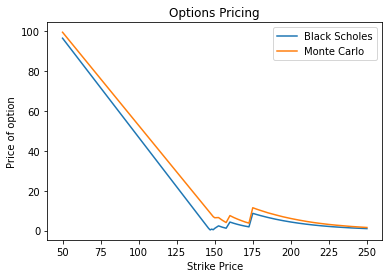

In [17]:
#Plotting and comparing results

import matplotlib.pyplot as plt

plt.plot(X, Y1, label = "Black Scholes")
plt.plot(X, Y2, label = "Monte Carlo")

plt.xlabel('Strike Price')
plt.ylabel('Price of option')
plt.title('Options Pricing')
plt.legend()
  
plt.show()